<a href="https://colab.research.google.com/github/WendyOira/Supervised-ML-Practice-/blob/main/Travel_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
from google.colab import files
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [2]:
uploaded = files.upload()

Saving TravelInsurancePrediction.csv to TravelInsurancePrediction.csv


In [3]:
# Load the file and view some of its rows and columns
travel = pd.read_csv(io.BytesIO(uploaded['TravelInsurancePrediction.csv']))
travel.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [4]:
# Identifying how the unnamed column is written
travel.columns

Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

In [5]:
# Deleting the unnamed column (I have no use for it)
travel.drop('Unnamed: 0', inplace=True, axis=1)
travel.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [6]:
# Properties of the dataframe
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [7]:
# Identify any missing data 
# We have no missing data, nothing to handle here 
travel.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [8]:
# Identify number of rows before I check for duplicates
len(travel)

1987

In [9]:
# Identify duplicates
travel[travel.duplicated()]

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
69,31,Government Sector,No,300000,4,0,No,No,0
103,26,Private Sector/Self Employed,Yes,1400000,5,0,No,Yes,1
117,31,Government Sector,Yes,400000,5,0,No,No,0
148,25,Private Sector/Self Employed,Yes,1400000,4,0,No,Yes,1
164,28,Government Sector,Yes,300000,6,0,No,No,0
...,...,...,...,...,...,...,...,...,...
1978,34,Private Sector/Self Employed,Yes,700000,5,0,No,No,1
1979,28,Private Sector/Self Employed,Yes,1100000,4,1,No,No,0
1980,25,Private Sector/Self Employed,No,1150000,5,1,No,No,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0


In [10]:
# Removing duplicates 
travel_df = travel.drop_duplicates()
travel_df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [11]:
# Confirm how many rows are left
# This is still a significant amount of data 
len(travel_df)

1249

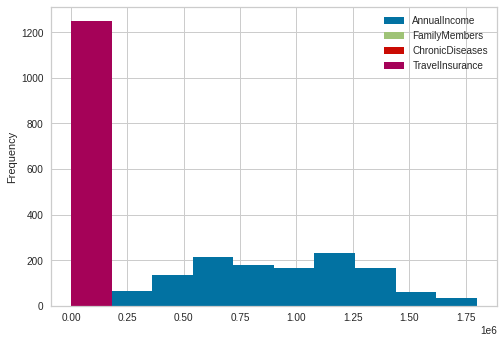

In [12]:
# Confirm the distribution of the numerical variables 
travel_df.plot.hist(x = "Age")

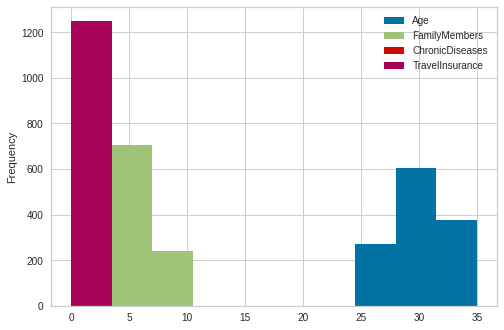

In [13]:
# Confirm the distribution of the numerical variables 
travel_df.plot.hist(x = "AnnualIncome")

In [14]:
# Analysis by age 
# The age with highest number of surveyed candidates is 28
travel_df.groupby("Age")["Age"].count()

Age
25     87
26     91
27     91
28    283
29    125
30     47
31    148
32     67
33    108
34    158
35     44
Name: Age, dtype: int64

In [15]:
# Analysis by Employment Type 
# Most candidates work in the private sector
travel_df.groupby("Employment Type")["Employment Type"].count()

Employment Type
Government Sector               373
Private Sector/Self Employed    876
Name: Employment Type, dtype: int64

In [16]:
# Analysis by GraduateOrNot 
# Most candidates are college graduates
travel_df.groupby("GraduateOrNot")["GraduateOrNot"].count()

GraduateOrNot
No      202
Yes    1047
Name: GraduateOrNot, dtype: int64

In [17]:
# Analysis by Annual Income
# Most candidates earn 1400000
travel_df.groupby("AnnualIncome")["AnnualIncome"].count()

AnnualIncome
300000     31
350000     33
400000     31
450000     12
500000     90
550000     58
600000     70
650000     29
700000     56
750000     48
800000     86
850000     46
900000     57
950000     19
1000000    36
1050000    54
1100000    74
1150000    43
1200000    67
1250000    47
1300000    68
1350000    26
1400000    73
1450000    19
1500000    36
1550000     4
1650000     2
1700000    15
1750000    15
1800000     4
Name: AnnualIncome, dtype: int64

In [18]:
# Analysis by Family Members 
# Most candidates are in a family of 4
travel_df.groupby("FamilyMembers")["FamilyMembers"].count()

FamilyMembers
2     78
3    225
4    275
5    243
6    186
7    140
8     52
9     50
Name: FamilyMembers, dtype: int64

In [19]:
# Analysis by Chronic Diseases
travel_df.groupby("ChronicDiseases")["ChronicDiseases"].count()

ChronicDiseases
0    833
1    416
Name: ChronicDiseases, dtype: int64

In [20]:
# Analysis by Frequent Flyer
# Most candidates are not frequent flyers
travel_df.groupby("FrequentFlyer")["FrequentFlyer"].count()

FrequentFlyer
No     954
Yes    295
Name: FrequentFlyer, dtype: int64

In [21]:
# Analysis by Ever travelled Abroad
# Most candidates have never travelled abroad
travel_df.groupby("EverTravelledAbroad")["EverTravelledAbroad"].count()

EverTravelledAbroad
No     1005
Yes     244
Name: EverTravelledAbroad, dtype: int64

In [22]:
# Analysis by Travel Insurance
# Most candidates do not buy travel insurance 
travel_df.groupby("TravelInsurance")["TravelInsurance"].count()

TravelInsurance
0    766
1    483
Name: TravelInsurance, dtype: int64

VISUALIZATIONS 

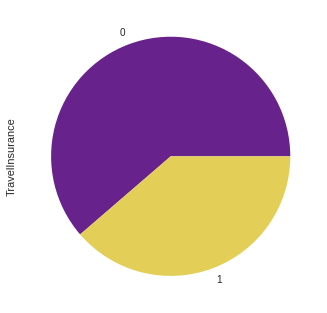

In [23]:
# Insurance Plot
colors =['#68228B','#E3CF57']
travel_df.groupby("TravelInsurance")["TravelInsurance"].count().plot(kind = 'pie', colors =colors)

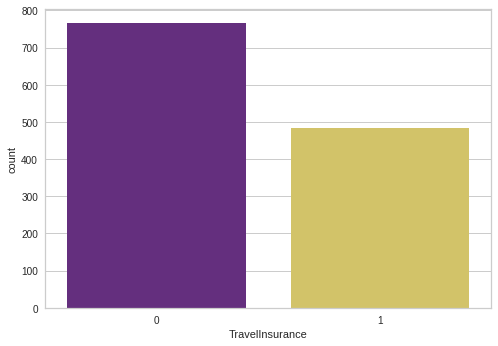

In [24]:
# Insurance plot bar chart 
sns.countplot(x='TravelInsurance', data=travel_df, palette = colors)

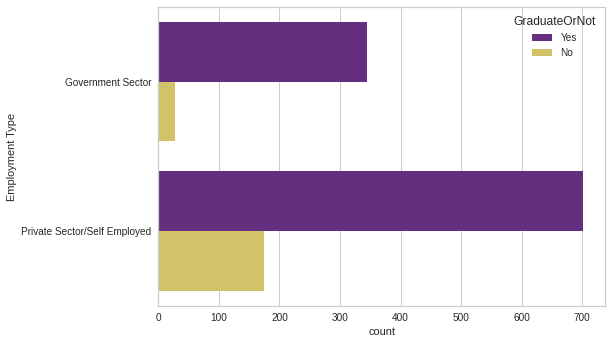

In [25]:
# Comparision of Government and Private sector employees who've graduated or not
sns.countplot(y ='Employment Type', hue = 'GraduateOrNot', data = travel_df, palette = colors)

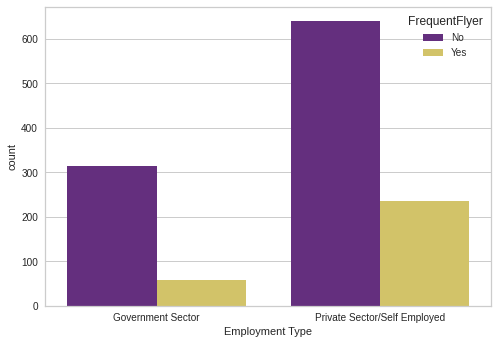

In [26]:
# Comparision of Government and Private sector employees who are frequent flyers 
sns.set_palette("Dark2")
sns.countplot(x ='Employment Type', hue = 'FrequentFlyer', data = travel_df, palette = colors)

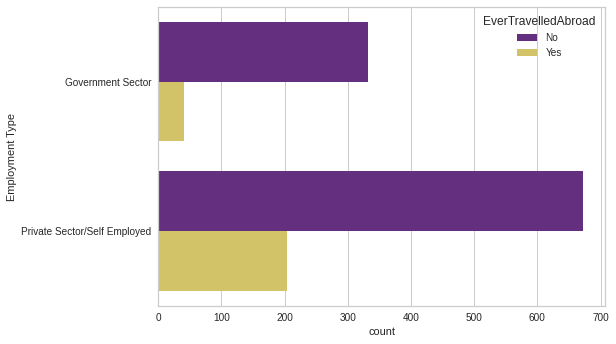

In [27]:
# Comparision of Government and Private sector employees who have ever travelled abroad 
sns.set_palette("Dark2")
sns.countplot(y ='Employment Type', hue = 'EverTravelledAbroad', data = travel_df, palette = colors)

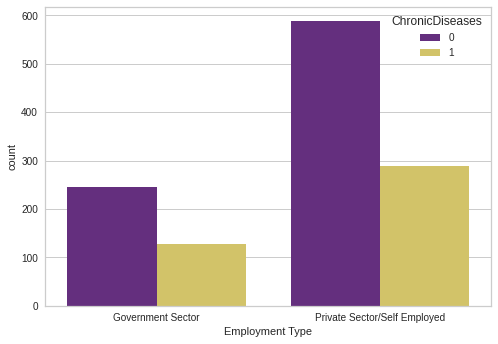

In [28]:
# Comparision of Government and Private sector employees who have chronic diseases
sns.set_palette("Dark2")
sns.countplot(x ='Employment Type', hue = 'ChronicDiseases', data = travel_df, palette = colors)

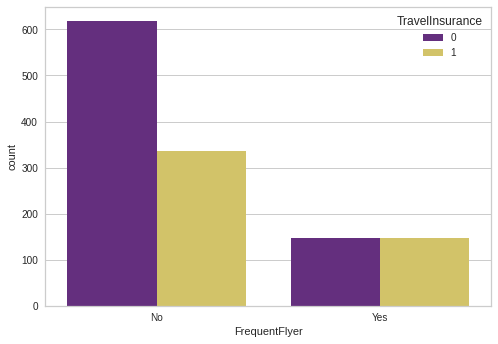

In [29]:
# Comparision of frequent flyers and Travel Insurance  
sns.countplot(x ='FrequentFlyer', hue = 'TravelInsurance', data = travel_df, palette = colors) 

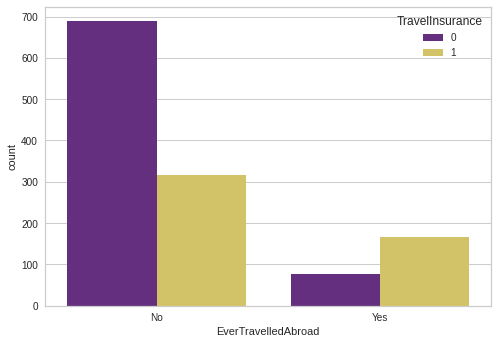

In [30]:
# Comparision of Ever Travelled Abroad and Travel Insurance  
sns.countplot(x ='EverTravelledAbroad', hue = 'TravelInsurance', data = travel_df, palette = colors) 

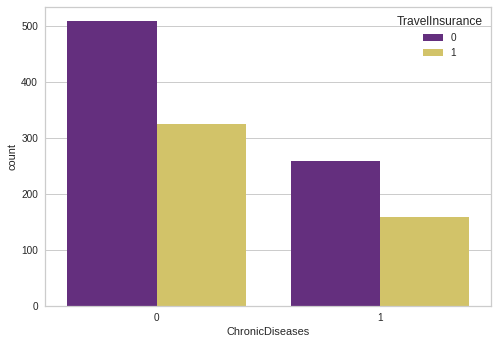

In [31]:
# Comparision of Chronic Diseases and Travel Insurance  
sns.countplot(x ='ChronicDiseases', hue = 'TravelInsurance', data = travel_df, palette = colors) 

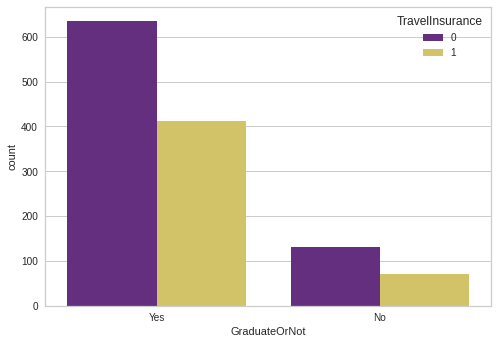

In [32]:
# Comparision of Graduate or not and Travel Insurance  
sns.countplot(x ='GraduateOrNot', hue = 'TravelInsurance', data = travel_df, palette = colors) 

MACHINE LEARNING 

KNN

In [33]:
# loading the dataframe to identify variables that need to be encoded to numerical values
travel_df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [34]:
# Label encode or one hot encoding 
# We will encode variables with categorical values (Employment Type, GraduateOrNot, FrequentFlyer, EverTravelledAbroad)
travel_enc = travel_df
label_encoder = preprocessing.LabelEncoder()
travel_enc['GraduateOrNot']= label_encoder.fit_transform(travel_enc['GraduateOrNot']) 
travel_enc['FrequentFlyer']= label_encoder.fit_transform(travel_enc['FrequentFlyer'])
travel_enc['EverTravelledAbroad']= label_encoder.fit_transform(travel_enc['EverTravelledAbroad']) 
travel_enc['Employment Type']= label_encoder.fit_transform(travel_enc['Employment Type']) 

<ipython-input-34-76b9899351e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  travel_enc['GraduateOrNot']= label_encoder.fit_transform(travel_enc['GraduateOrNot'])
<ipython-input-34-76b9899351e2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  travel_enc['FrequentFlyer']= label_encoder.fit_transform(travel_enc['FrequentFlyer'])
<ipython-input-34-76b9899351e2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [35]:
# Confirm changes
travel_enc.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0


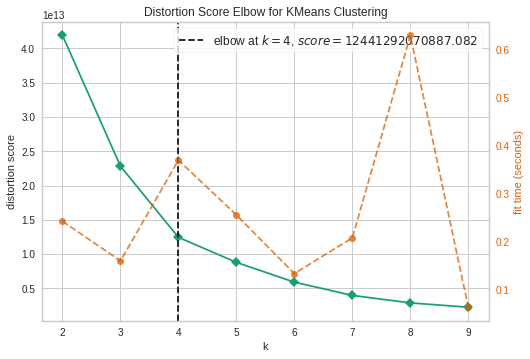

In [36]:
# Identify the perfect k value 
# Elbow curve
X = travel_enc.iloc[:,0:8]
Y = travel_enc['TravelInsurance']
km = KMeans(random_state = 42)
visualizer = KElbowVisualizer(km, k = (2,10))
visualizer.fit(X)
visualizer.show()

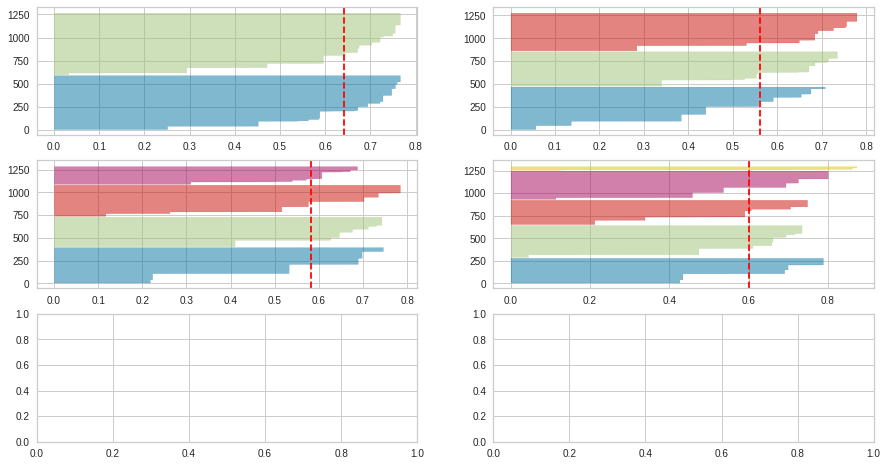

In [37]:
# Identifying the perfect k value 
# Using Silhouette plot
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(3,2, figsize = (15,8))
for i in [2,3,4,5]:
  km = KMeans(n_clusters= i , init = 'k-means++', n_init = 10, max_iter=100, random_state = 42)
  q,mod = divmod(i,2)
  visualizer = SilhouetteVisualizer(km, colors ='yellowbrick', ax = ax[q-1][mod])
  visualizer.fit(X)

In [38]:
# Lets standardize our independent variables 
from sklearn import preprocessing
 
# standardization of dependent variables
standard = preprocessing.scale(X)
print(standard)

[[ 0.42611337 -1.53248996  0.43924047 ...  1.4150632  -0.55607942
  -0.49273326]
 [ 0.42611337  0.65253282  0.43924047 ... -0.70668222 -0.55607942
  -0.49273326]
 [ 1.45355661  0.65253282  0.43924047 ...  1.4150632  -0.55607942
  -0.49273326]
 ...
 [ 1.11107553  0.65253282  0.43924047 ... -0.70668222  1.79830429
   2.02949562]
 [-0.60132987  0.65253282  0.43924047 ...  1.4150632  -0.55607942
   2.02949562]
 [ 1.45355661  0.65253282  0.43924047 ... -0.70668222  1.79830429
   2.02949562]]


In [71]:
# Split our data into train and test 
from sklearn.model_selection import train_test_split
# using the train test split function (Spliting thr data into 30% test and 70% Train)
X_train, X_test, y_train, y_test = train_test_split(X,Y ,random_state=42, test_size=0.30)

In [72]:
# Finding optimal k value using grid search CV
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

print(grid_search.best_params_)

accuracy = grid_search.best_score_ *100
print(accuracy)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 10}
71.63009404388715


In [73]:
#Create KNN Classifier
knn_3= KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn_3.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_3 = knn_3.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_3))

Accuracy: 0.7173333333333334


In [74]:
#Create KNN Classifier
knn_4= KNeighborsClassifier(n_neighbors=4)

#Train the model using the training sets
knn_4.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_4 = knn_4.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_4))

Accuracy: 0.736


In [75]:
#Create KNN Classifier
knn_12= KNeighborsClassifier(n_neighbors=12)

#Train the model using the training sets
knn_12.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_12 = knn_12.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_12))

Accuracy: 0.7653333333333333


DECISION TREE

In [76]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
dty_pred = decision_tree.predict(X_test)
print(accuracy_score(y_test, dty_pred))

0.608


In [77]:
# lets do some hyperparameter tuning
clf = DecisionTreeClassifier(random_state=123)
params = {'max_depth':[3,5,7,10,15],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[8,10,12,18,20,16],
          'criterion':['gini','entropy']}

grid_dt = GridSearchCV(estimator = clf, param_grid = params, scoring = 'accuracy', cv = 10, n_jobs=1)

In [63]:
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15],
                         'min_samples_leaf': [3, 5, 10, 15, 20],
                         'min_samples_split': [8, 10, 12, 18, 20, 16]},
             scoring='accuracy')

In [64]:
grid_dt.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8}

In [65]:
grid_dt.best_score_

0.7791144200626959

In [66]:
# Use the best parameters in our decision tree model
decision_hp = DecisionTreeClassifier(criterion = 'gini',max_depth = 3, min_samples_leaf = 3, min_samples_split =8, random_state=123)
decision_hp.fit(X_train, y_train)
hpy_pred = decision_hp.predict(X_test)
print(accuracy_score(y_test, hpy_pred))

0.768


RANDOM FOREST

In [67]:
# importing random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_mdl = RandomForestClassifier(n_estimators = 100)
rf_mdl.fit(X_train, y_train)
y_pred_rf = rf_mdl.predict(X_test)
print(accuracy_score(y_test, y_pred_rf))

0.6426666666666667


In [68]:
# Hyperparameter tuning 
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
    }

grid_search_rf= GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search_rf.fit(X_train, y_train)
print(grid_search_rf.best_estimator_)

RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=6,
                       n_estimators=25)


In [69]:
grid_search_rf.best_params_

{'max_depth': 3, 'max_features': None, 'max_leaf_nodes': 6, 'n_estimators': 25}

In [78]:
# Use the best parameters
rf_hp = RandomForestClassifier(max_depth = 3, max_features= None , max_leaf_nodes= 6, n_estimators = 25)
rf_hp.fit(X_train, y_train)
y_pred_fhp = rf_hp.predict(X_test)
print(accuracy_score(y_test, y_pred_fhp))

0.7973333333333333


In [ ]:
# Cross Validation
# Cross-validation is a technique in which we train our model using the subset of the data-set 
# and then evaluate using the complementary subset of the data-set.

In [79]:
# K fold cv on the Decision tree model
from sklearn.model_selection import KFold, cross_val_score
clf_cv = DecisionTreeClassifier(random_state=42)
k_folds = KFold(n_splits = 5)
scores = cross_val_score(clf_cv, X, Y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.608      0.632      0.624      0.608      0.59839357]
Average CV Score:  0.6140787148594378
Number of CV Scores used in Average:  5


In [81]:
# K fold cv on the random forest model
from sklearn.model_selection import KFold, cross_val_score
rf_cv = RandomForestClassifier(random_state=42)
k_folds_rf = KFold(n_splits = 10)
scores_rf = cross_val_score(rf_cv, X, Y, cv = k_folds_rf)

print("Cross Validation Scores: ", scores_rf)
print("Average CV Score: ", scores_rf.mean())
print("Number of CV Scores used in Average: ", len(scores_rf))

Cross Validation Scores:  [0.608      0.616      0.656      0.656      0.72       0.624
 0.64       0.6        0.616      0.62903226]
Average CV Score:  0.6365032258064515
Number of CV Scores used in Average:  10


SUPPORT VECTOR MACHINES

In [86]:
#Import svm model 
from sklearn import svm
# Create a svm Classifier
clf_svm = svm.SVC(kernel='linear') # Linear Kernel
# Train the model using the training sets
clf_svm.fit(X_train, y_train)
# Predict the response for test dataset
y_pred_svm = clf_svm.predict(X_test)
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))

Accuracy: 0.632
